In [104]:
%matplotlib inline

In [105]:
import pandas as pd
import numpy as np
from io import StringIO
from matplotlib import pylab as plt
plt.style.use('default')

In [106]:
!ls

after.png           before.png          life_expectancy.csv
b_a.png             demo_02_01.ipynb


In [107]:
tbl_life_expectancy = pd.read_csv('life_expectancy.csv').set_index('Country Name')
tbl_life_expectancy.tail()

,Country Code,is_oecd,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Seychelles,SYC,False,Sub-Saharan Africa,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,73.192683,73.163415,73.034146,73.197561,72.72439,74.226829,73.119512,73.229268,NaN,NaN
Turks and Caicos Islands,TCA,False,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuvalu,TUV,False,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
British Virgin Islands,VGB,False,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,False,Middle East & North Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,71.747049,71.894951,72.051098,72.214927,72.38539,72.558854,72.732244,72.904024,NaN,NaN


In [108]:
countries_to_plot = 'United Kingdom, Italy, France, Israel, Luxembourg'.split(', ')
columns_to_plot = list(map(str, range(1970, 2015)))

In [109]:
tbl_to_plot = tbl_life_expectancy.loc[countries_to_plot][columns_to_plot]
tbl_to_plot

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
United Kingdom,71.973171,72.273171,72.124390,72.324390,72.524390,72.724390,72.775610,73.224390,73.175610,73.275610,...,79.048780,79.248780,79.448780,79.600000,80.051220,80.402439,80.951220,80.904878,81.004878,81.056098
Italy,71.558780,71.806829,72.075366,72.026341,72.734390,72.647317,72.991951,73.364634,73.693171,74.002683,...,80.782927,81.282927,81.434146,81.485366,81.636585,82.036585,82.187805,82.239024,82.690244,82.690244
France,71.658537,71.907317,72.107317,72.356098,72.604878,72.853659,73.102439,73.351220,73.602439,73.851220,...,80.163415,80.812195,81.112195,81.214634,81.414634,81.663415,82.114634,81.968293,82.219512,82.373171
Israel,71.213415,71.719024,71.078049,71.693415,71.661707,72.045122,72.956098,72.958537,73.207317,73.507317,...,80.151220,80.553659,80.504878,80.951220,81.404878,81.602439,81.656098,81.704878,82.056098,82.153659
Luxembourg,69.983463,70.081439,70.205317,70.358171,70.542561,70.757610,70.998512,71.256293,71.522463,71.794463,...,79.431707,79.287805,79.382927,80.539024,80.636585,80.631707,80.987805,81.392683,81.800000,82.207317


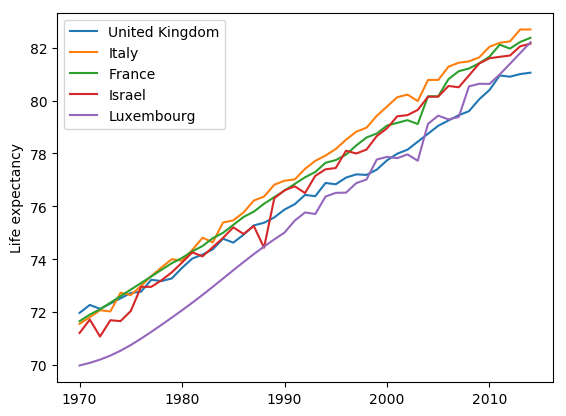

In [110]:
fig, ax = plt.subplots()
years = [int(c) for c in tbl_to_plot.columns]
for country, data in tbl_to_plot.iterrows():
    ax.plot(years, data, '-', label=country)
ax.legend()
ax.set_ylabel('Life expectancy')

In [111]:
average_life_expectancy = tbl_to_plot.mean(axis=0).values.reshape(1, -1).repeat(len(countries_to_plot), axis=0)
# average_life_expectancy
tbl_to_plot = tbl_life_expectancy.loc[countries_to_plot][columns_to_plot]
tbl_to_plot = (tbl_to_plot / average_life_expectancy) * 100
# tbl_to_plot

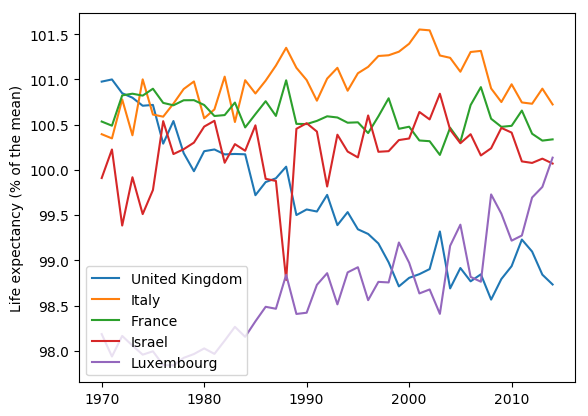

In [112]:
fig, ax = plt.subplots()
years = [int(c) for c in tbl_to_plot.columns]
for country, data in tbl_to_plot.iterrows():
    ax.plot(years, data, '-', label=country)
ax.legend()
ax.set_ylabel('Life expectancy (% of the mean)')
fig.savefig('before.png')

In [119]:
def despine_axis(
    ax=None, top=True, right=True, left=False, bottom=False):
    if ax is None:
        ax = plt.gca()
    spines = ax.spines
    spines['top'].set_visible(not top)
    spines['right'].set_visible(not right)
    spines['left'].set_visible(not left)
    spines['bottom'].set_visible(not bottom)
    return ax

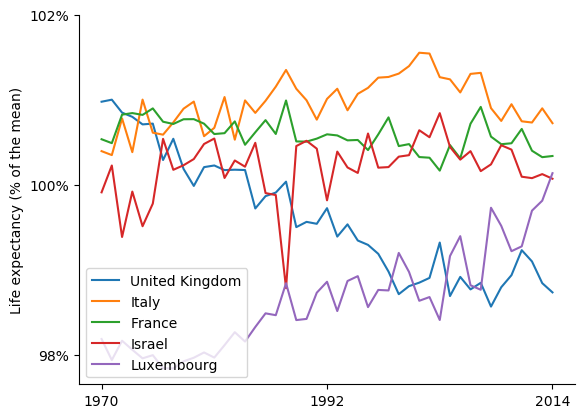

In [126]:
fig, ax = plt.subplots()
years = [int(c) for c in tbl_to_plot.columns]
for country, data in tbl_to_plot.iterrows():
    ax.plot(years, data, '-', label=country)
ax.legend()
ax.set_ylabel('Life expectancy (% of the mean)')
despine_axis(ax=ax);
#
ax.set_xticks([1970, 1992, 2014])
ax.set_yticks([98, 100, 102])
ax.set_yticklabels(['98%', '100%', '102%']);

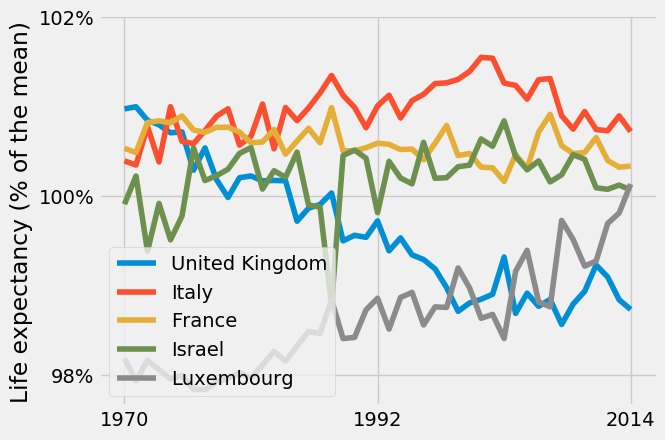

In [127]:
with plt.style.context('fivethirtyeight') as style:
    fig, ax = plt.subplots()
    years = [int(c) for c in tbl_to_plot.columns]
    for country, data in tbl_to_plot.iterrows():
        ax.plot(years, data, '-', label=country)
    ax.legend()
    ax.set_ylabel('Life expectancy (% of the mean)')
    despine_axis(ax=ax)
    ax.set_xticks([1970, 1992, 2014])
    ax.set_yticks([98, 100, 102])
    ax.set_yticklabels(['98%', '100%', '102%']);

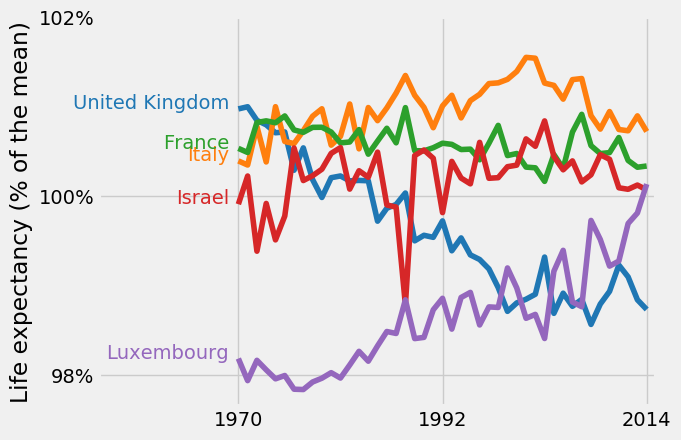

In [130]:
with plt.style.context('fivethirtyeight') as style:
    colormap = plt.cm.Vega10
    fig, ax = plt.subplots()
    years = [int(c) for c in tbl_to_plot.columns]
    for i, (country, data) in enumerate(tbl_to_plot.iterrows()):
        ax.plot(years, data, '-', label=country, color=colormap(i))
        text_x = 1969
        text_y = data.iloc[0]
        ax.text(text_x, text_y, country, ha='right', color=colormap(i))
    ax.set_ylabel('Life expectancy (% of the mean)')
    ax.set_xticks([1970, 1992, 2014])
    ax.set_yticks([98, 100, 102])
    ax.set_yticklabels(['98%', '100%', '102%']);
    #
    ax.set_xlim(1955, 2015)
    # move tick specs from above
    ax.set_xticks([1970, 1992, 2014])
    #
    fig.savefig('after.png', bbox_inches='tight')

In [131]:
from IPython.display import Image

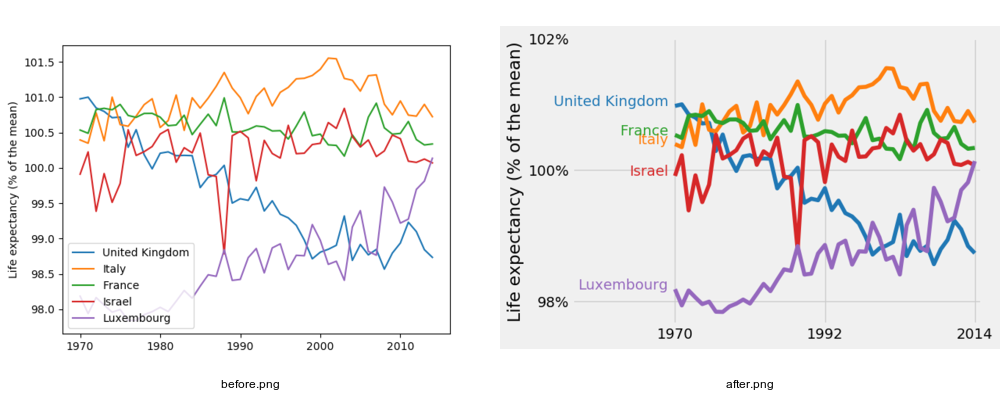

In [132]:
! montage -label %f -geometry '500' before.png after.png b_a.png
Image('b_a.png')